# 多項分布の多変量正規分布近似とχ²検定の導出

* 黒木玄
* 2024-10-08
$
\newcommand\op{\operatorname}
\newcommand\ds{\displaystyle}
$

See also https://x.com/genkuroki/status/1843653103960371268

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#方針" data-toc-modified-id="方針-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>方針</a></span></li><li><span><a href="#Poisson分布の正規分布近似" data-toc-modified-id="Poisson分布の正規分布近似-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Poisson分布の正規分布近似</a></span></li><li><span><a href="#$d$-変量正規分布と自由度-$d$-のχ²分布の関係" data-toc-modified-id="$d$-変量正規分布と自由度-$d$-のχ²分布の関係-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>$d$ 変量正規分布と自由度 $d$ のχ²分布の関係</a></span></li><li><span><a href="#Poisson分布達の直積の多変量正規分布近似" data-toc-modified-id="Poisson分布達の直積の多変量正規分布近似-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Poisson分布達の直積の多変量正規分布近似</a></span></li><li><span><a href="#Poisson分布達の直積と多項分布の関係" data-toc-modified-id="Poisson分布達の直積と多項分布の関係-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Poisson分布達の直積と多項分布の関係</a></span></li><li><span><a href="#多項分布の多変量正規分布近似" data-toc-modified-id="多項分布の多変量正規分布近似-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>多項分布の多変量正規分布近似</a></span><ul class="toc-item"><li><span><a href="#多項分布とそれを近似する多変量正規分布の同時可視化" data-toc-modified-id="多項分布とそれを近似する多変量正規分布の同時可視化-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>多項分布とそれを近似する多変量正規分布の同時可視化</a></span></li><li><span><a href="#多項分布のPearsonのχ²統計量の補累積分布関数のグラフ" data-toc-modified-id="多項分布のPearsonのχ²統計量の補累積分布関数のグラフ-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>多項分布のPearsonのχ²統計量の補累積分布関数のグラフ</a></span></li></ul></li><li><span><a href="#「カイ二乗検定は何をやっているのか」のP値による再現" data-toc-modified-id="「カイ二乗検定は何をやっているのか」のP値による再現-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>「カイ二乗検定は何をやっているのか」のP値による再現</a></span><ul class="toc-item"><li><span><a href="#事後分布とP値関数を並べてプロット" data-toc-modified-id="事後分布とP値関数を並べてプロット-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>事後分布とP値関数を並べてプロット</a></span></li><li><span><a href="#P値関数の側を確率密度関数に変換してからプロット" data-toc-modified-id="P値関数の側を確率密度関数に変換してからプロット-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>P値関数の側を確率密度関数に変換してからプロット</a></span></li><li><span><a href="#事後分布の側をP値関数に変換してプロット" data-toc-modified-id="事後分布の側をP値関数に変換してプロット-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>事後分布の側をP値関数に変換してプロット</a></span></li></ul></li><li><span><a href="#Pearsonのχ²検定のP値関数を近似するベイズ的なP値関数" data-toc-modified-id="Pearsonのχ²検定のP値関数を近似するベイズ的なP値関数-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Pearsonのχ²検定のP値関数を近似するベイズ的なP値関数</a></span></li></ul></div>

In [1]:
ENV["COLUMNS"] = 200
using Distributions
using FiniteDifferences
using LinearAlgebra: I, eigen
using Random
using Roots
using StatsPlots
default(fmt=:png, titlefontsize=10, plot_titlefontsize=12)

## 方針

多項分布の多変量正規分布近似は多項分布のχ²検定の基礎になる.

$r$ 項分布の多変量正規分布近似は, 
$r$ 項分布が $r$ 個のPoisson分布の直積の条件付き確率分布なので,
$r$ 個のPoisson分布の直積の多変量正規分布近似を最初に求めておくと理解し易い.

$r$ 個のPoisson分布の直積の多変量正規分布近似は,
$1$ 個のPoisson分布の正規分布近似の直積として得られる.

## Poisson分布の正規分布近似

期待値 $\lambda > 0$ のPoisson分布 $\op{Poisson}(\lambda)$ の確率質量関数は

$$
P(k|\lambda) = e^{-\lambda}\frac{\lambda^k}{k!} \quad (k=0,1,2,\ldots)
$$

である. 期待値 $\lambda$ のPoisson分布の分散も $\lambda$ であり, 
$\lambda$ を十分に大きくするとPoisson分布は正規分布で近似されるので,

$$
p(k|\lambda) \approx \frac{1}{\sqrt{2\pi\lambda}}\exp\left( -\frac{1}{2}\frac{(k - \lambda)^2}{\lambda} \right).
$$

以下, $\lambda$ は十分に大きいと仮定する.

上で述べたことより, $k \sim \op{Poisson}(\lambda)$ ならば $\dfrac{k-\lambda}{\sqrt{\lambda}}$ は標準正規分布に近似的に従う.

ゆえに, $\dfrac{(k-\lambda)^2}{\lambda}$ は近似的に自由度 $1$ のχ²分布に従う.

In [2]:
function plot_poi(; λ=20, kwargs...)
    poi = Poisson(λ)
    normal = Normal(λ, √λ)
    bar(poi; alpha=0.3, label="Poisson($λ)")
    plot!(normal; label="Normal($λ, √$λ)", lw=2)
    plot!(; xlim=(λ-4√λ, λ+4√λ), kwargs...)
end

plot_poi (generic function with 1 method)

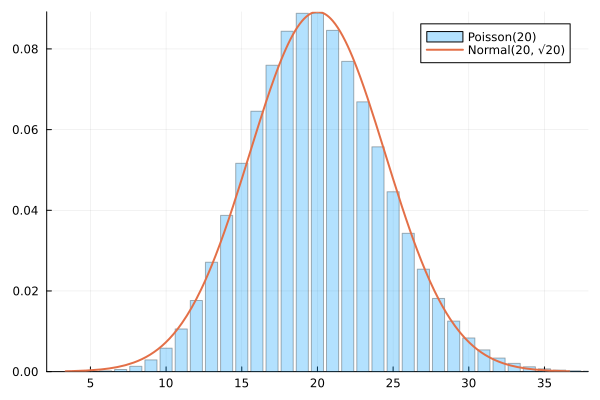

In [3]:
plot_poi(; λ=20)

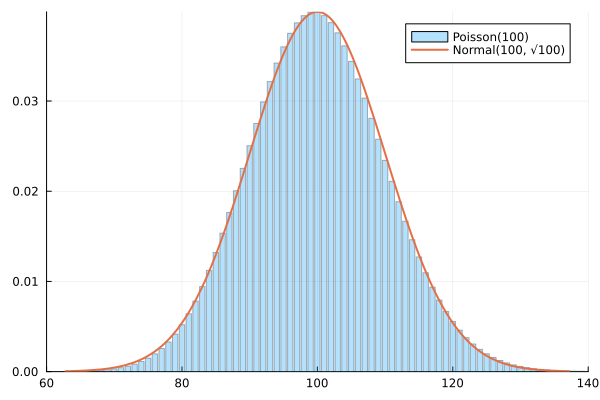

In [4]:
plot_poi(; λ=100)

## $d$ 変量正規分布と自由度 $d$ のχ²分布の関係

一般に期待値 $(\mu_1,\ldots,\mu_d)$ を持つ $d$ 変量正規分布の確率密度関数は

$$
p(x_1,\ldots,x_d) =
\op{const.} \exp\left(-\frac{1}{2} \sum_{i,j=1}^d b_{ij}(x_i-\mu_i)(x_j-\mu_j)\right),
\quad b_{ij}=b_{ji}\in\mathbb{R}
$$

の形に書ける. このとき, $(x_1,\ldots,x_d)$ がこの形の多変量正規分布に従う確率変数ならば,

$$
\chi^2 = \sum_{i,j=1}^d b_{ij}(x_i-\mu_i)(x_j-\mu_j)
$$

は自由度 $d$ のχ²分布に従うことを, 実対称行列の直交行列による対角化を使って示せる.

In [5]:
function plot_sqmahal(mvn::MvNormal; L=10^6)
    d = length(mvn)
    MSq = zeros(L)
    Xtmp = [zeros(d) for _ in 1:Threads.nthreads()]
    Threads.@threads for i in 1:L
        tid = Threads.threadid()
        X = rand!(mvn, Xtmp[tid])
        MSq[i] = sqmahal(mvn, X)
    end
    stephist(MSq; norm=true, label="squared Mahalanobis")
    plot!(Chisq(d), extrema(MSq)...; label="Chisq($d)", ls=:dash)
end

function plot_rand_sqmahal(;
        d = rand(5:15),
        μ = round.(10randn(d); sigdigits=3),
        Σ = round.(rand(Wishart(30.0, 0.1Matrix{Float64}(I, d, d))); sigdigits=3),
        L = 10^6)
    @show d
    @show μ
    print("Σ = "); display(Σ)
    mvn = MvNormal(μ, Σ)
    plot_sqmahal(mvn; L)
end

plot_rand_sqmahal (generic function with 1 method)

d = 8
μ = [6.44, 10.3, -9.08, -7.69, -0.021, -13.9, -19.3, 1.84]
Σ = 

8×8 Matrix{Float64}:
  4.4      -0.435   0.0644   0.725    0.00235  -0.376   0.469  -0.837
 -0.435     2.4     0.37    -0.896   -0.402     0.363  -0.553  -0.385
  0.0644    0.37    2.59     0.0297  -0.506    -0.519  -0.343  -0.274
  0.725    -0.896   0.0297   4.07     0.0393   -0.525   0.58   -0.062
  0.00235  -0.402  -0.506    0.0393   2.49     -0.52   -0.596   0.0219
 -0.376     0.363  -0.519   -0.525   -0.52      2.03    0.608   0.157
  0.469    -0.553  -0.343    0.58    -0.596     0.608   1.92   -0.063
 -0.837    -0.385  -0.274   -0.062    0.0219    0.157  -0.063   2.49

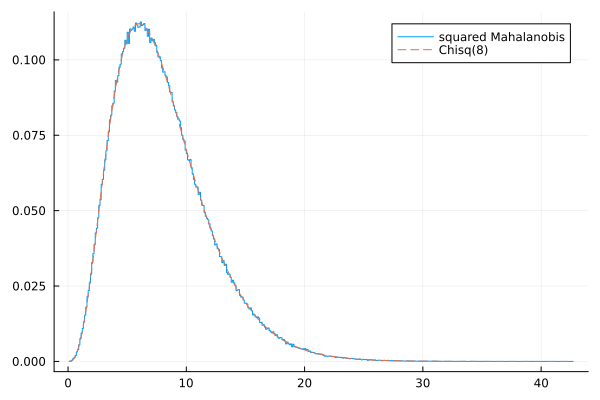

In [6]:
plot_rand_sqmahal()

d = 11
μ = [-9.08, -11.4, -16.4, -8.87, -6.0, 15.2, -3.28, 8.02, -2.93, -6.4, -0.456]
Σ = 

11×11 Matrix{Float64}:
  1.69     0.317     0.217    0.196    -0.925    -0.259   -0.599   -0.37    -0.107     0.0656  -0.199
  0.317    2.13     -0.0131  -0.391    -0.00865  -0.147    0.612    0.113    0.543    -0.645   -0.292
  0.217   -0.0131    2.34    -0.231    -0.417    -0.186    0.0539   0.488   -0.292    -0.145   -0.13
  0.196   -0.391    -0.231    2.5      -0.0802    0.354    0.115    0.0681   0.00772   0.465   -1.02
 -0.925   -0.00865  -0.417   -0.0802    2.69     -0.452    1.45     0.0532   0.0803   -0.379   -0.605
 -0.259   -0.147    -0.186    0.354    -0.452     2.43     0.0331   0.0129   0.31      0.73    -1.09
 -0.599    0.612     0.0539   0.115     1.45      0.0331   3.64     0.451    0.206    -0.816   -0.553
 -0.37     0.113     0.488    0.0681    0.0532    0.0129   0.451    2.94     0.304    -0.615   -0.0535
 -0.107    0.543    -0.292    0.00772   0.0803    0.31     0.206    0.304    2.24     -0.197   -0.345
  0.0656  -0.645    -0.145    0.465    -0.379     0.73    -0.

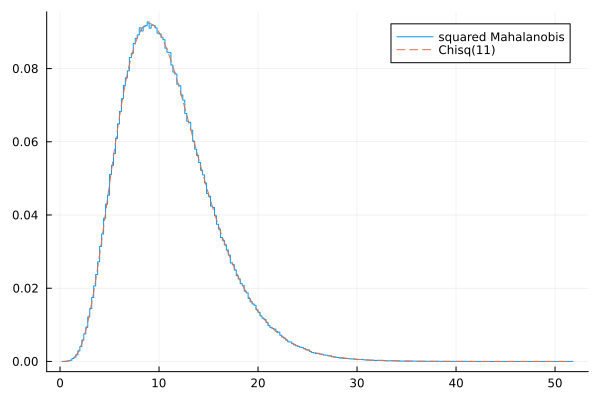

In [7]:
plot_rand_sqmahal()

d = 6
μ = [-7.22, -11.7, -7.68, 1.22, -11.8, -3.85]
Σ = 

6×6 Matrix{Float64}:
  3.25    -0.165   0.152   0.0834  -0.189  -0.0889
 -0.165    2.85    0.0401  0.0557  -0.364   0.299
  0.152    0.0401  2.87    0.629    0.308   0.276
  0.0834   0.0557  0.629   3.21     1.3     0.104
 -0.189   -0.364   0.308   1.3      2.95   -1.04
 -0.0889   0.299   0.276   0.104   -1.04    4.11

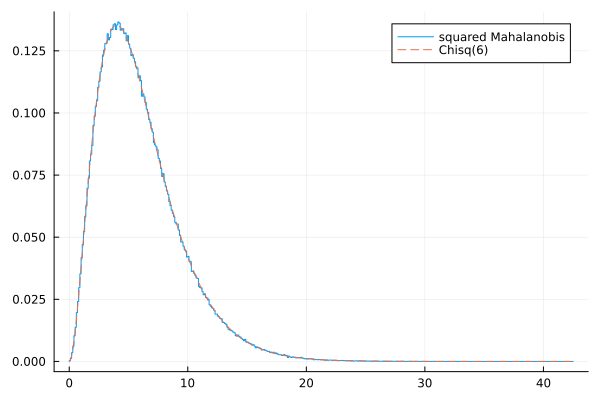

In [8]:
plot_rand_sqmahal()

## Poisson分布達の直積の多変量正規分布近似

$\lambda_1,\ldots,\lambda_r$ は十分大きいと仮定する.

$k_i \sim \op{Poisson}(\lambda_i)$ であるとし, $k_1,\ldots,k_r$ は独立であるとする.

このとき, $\dfrac{k_i-\lambda_i}{\sqrt{\lambda_i}}$ 達は独立であり,
それぞれ近似的に標準正規分布に従う.

ゆえに, $(k_1,\ldots,k_r)$ は近似的に次の形の確率密度関数を持つ多変量正規分布に近似的に従う:

$$
\op{const.} \exp\left(-\frac{1}{2}\sum_{i=1}^r \frac{(k_i - \lambda_i)^2}{\lambda_i} \right).
$$

したがって, Pearsonのχ²統計量 

$$
\chi^2 = \sum_{i=1}^r \dfrac{(k_i - \lambda_i)^2}{\lambda_i}
$$

は自由度 $r$ のχ²分布に近似的に従う.

これで, $r$ 個のPoisson分布の直積から, 自然にPearsonのχ²統計量が出て来ることが分かった.

## Poisson分布達の直積と多項分布の関係

$n$ は正の整数であるとし, $p_i > 0$, $p_1+\cdots+p_r=1$ と仮定し, $\lambda_i=np_i$ とおく.  このとき, Poisson分布達の直積

$$
\prod_{i=1}^r P(k_i|\lambda_i) = \op{const.} \frac{\lambda_1^{k_1}\cdots\lambda_r^{k_r}}{k_1!\cdots k_r!}
\quad (k_i=0,1,2,\ldots)
$$

は条件 $k_1+\cdots+k_r=n$ の下で

$$
\prod_{i=1}^r P(k_i|\lambda_i) =
\op{const.} \frac{p_1^{k_1}\cdots p_r^{k_r}}{k_1!\cdots k_r!} =
\op{const.} \frac{n!}{k_1!\cdots k_r!} {p_1^{k_1}\cdots p_r^{k_r}}
$$

と書き直される. ゆえに, Poisson分布達の直積の条件

$$
k_1+\cdots+k_r=n
$$

による制限で得られた条件付き確率分布は多項分布 $\op{Multinomial}(n, [p_1,\ldots,p_r])$ になる.

## 多項分布の多変量正規分布近似

$n$ は十分大きいと仮定する.

以上で述べたことより, 多項分布 $\op{Multinomial}(n, [p_1,\ldots,p_r])$ は, 

$$
\op{const.} \exp\left(-\frac{1}{2}\sum_{i=1}^r \frac{(k_i - \lambda_i)^2}{\lambda_i} \right) =
\op{const.} \exp\left(-\frac{1}{2}\sum_{i=1}^r \frac{(k_i - n p_i)^2}{n p_i} \right)
$$

という形の確率密度関数を持つ $r$ 変量正規分布を条件

$$
k_1 + \cdots + k_r = n
$$

で制限して得られる条件付き確率分布で近似される. $k_1 + \cdots + k_r = n$ のとき

$$
k_r - n p_r = \sum_{i=1}^{r-1} (k_i - n p_i)
$$

となるので, Pearsonのχ²統計量 $\ds \chi^2 = \sum_{i=1}^r \frac{(k_i - n p_i)^2}{n p_i}$ は

$$
\chi^2 = \sum_{i,j=1}^{r-1} b_{ij}(k_i- n p_i)(k_j - n p_j)
$$

の形に書き直される. ゆえに, $(k_1,\ldots,k_r) \sim \op{Multinomial}(n, [p_1,\ldots,p_r])$ ならば
Pearsonのχ²統計量

$$
\chi^2 = \sum_{i=1}^r \frac{(k_i - n p_i)^2}{n p_i}
$$

は自由度 $r-1$ のχ²分布に近似的に従う.

### 多項分布とそれを近似する多変量正規分布の同時可視化

In [9]:
function plot_mult(; n=20, p=[0.2, 0.3, 0.5])
    mult = Multinomial(n, p)
    prob = [x+y ≤ n ? pdf(mult, [x, y, n-x-y]) : NaN for x in 0:n, y in 0:n]
    P = heatmap(0:n, 0:n, prob; label="", colorbar=false)
    title!("Multinomial($n, $p)")

    μ = mean(mult)[1:2]
    Σ = cov(mult)[1:2, 1:2]
    mvn = MvNormal(μ, Σ)
    xs = range(0, n, 400)
    ys = range(0, n, 400)
    den = [x+y ≤ n ? pdf(mvn, [x, y]) : NaN for x in xs, y in ys]
    Q = heatmap(xs, ys, den; label="", colorbar=false)
    title!("MvNormal($μ, $(round.(Σ; digits=2)))")

    plot(P, Q; size=(800, 400))
end

plot_mult (generic function with 1 method)

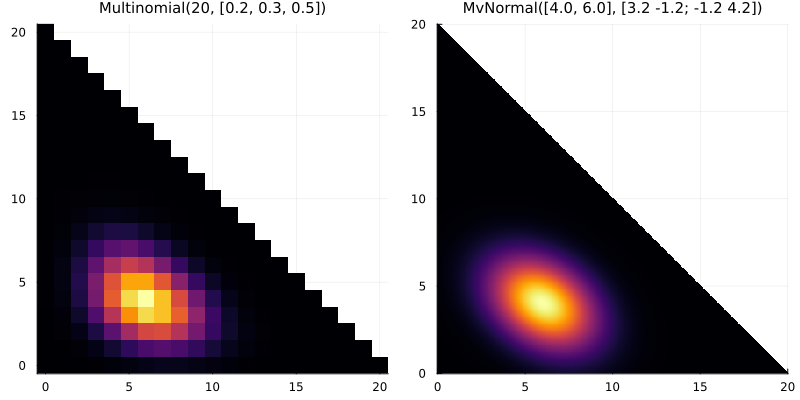

In [10]:
plot_mult(; n=20, p=[0.2, 0.3, 0.5])

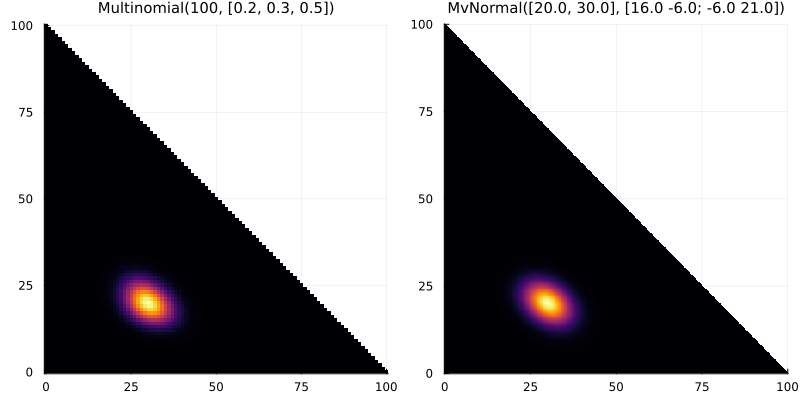

In [11]:
plot_mult(; n=100, p=[0.2, 0.3, 0.5])

### 多項分布のPearsonのχ²統計量の補累積分布関数のグラフ

In [12]:
ecdf_(A, x) = count(≤(x), A) / length(A)
eccdf_(A, x) = count(>(x), A) / length(A)

function chisq_pearson(x, p)
    n = sum(x)
    sum((x - n*p)^2/(n*p) for (x, p) in zip(x, p))
end

function plot_chisq_mult(; n=20, p=[0.2, 0.3, 0.5], L=10^5)
    mult = Multinomial(n, p)
    CP = zeros(L)
    Xtmp = [zeros(Int, length(p)) for _ in 1:Threads.nthreads()]
    Threads.@threads for i in 1:L
        tid = Threads.threadid()
        X = rand!(mult, Xtmp[tid])
        CP[i] = chisq_pearson(X, p)
    end
    r = length(p)
    chisq = Chisq(r-1)
    plot(x -> eccdf_(CP, x), -0.001, quantile(chisq, 0.999); norm=true, label="Pearson's χ²")
    plot!(x -> ccdf(chisq, x); label="Chisq($r-1)", ls=:dash)
    plot!(xguide="x", yguide="probability that χ² > x")
    plot!(ytick=0:0.05:1)
    title!("ccdf of Pearson's χ² for\nMultinomial($n, $(round.(p; sigdigits=3)))")
end

plot_chisq_mult (generic function with 1 method)

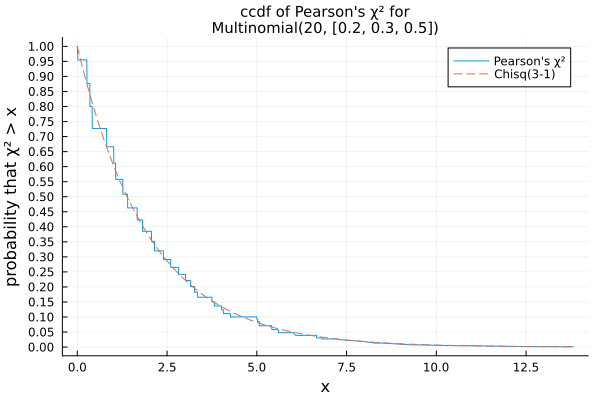

In [13]:
plot_chisq_mult(; n=20, p=[0.2, 0.3, 0.5])

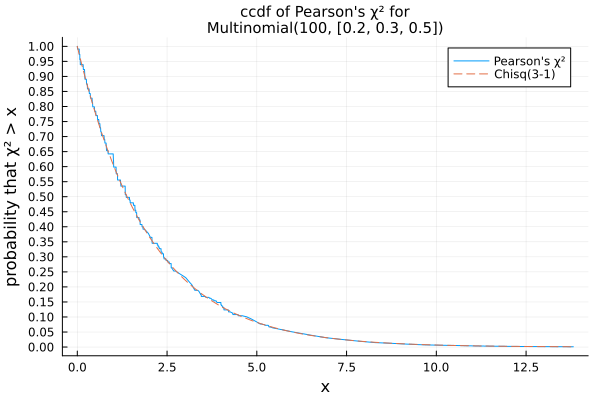

In [14]:
plot_chisq_mult(; n=100, p=[0.2, 0.3, 0.5])

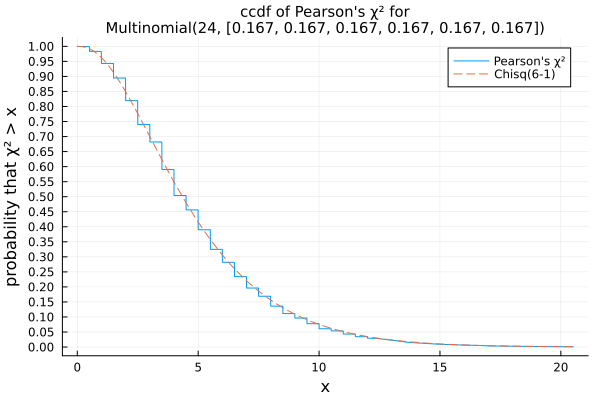

In [15]:
plot_chisq_mult(; n=4*6, p=fill(1/6, 6))

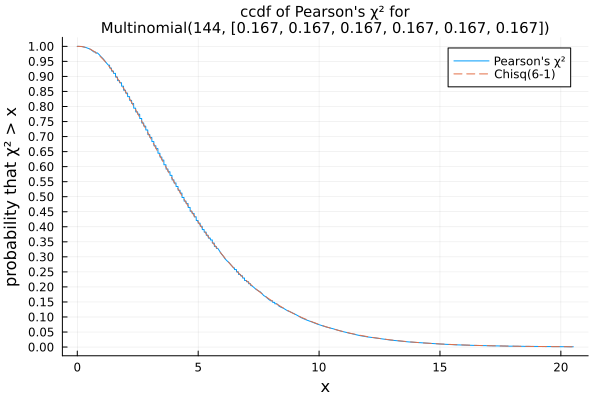

In [16]:
plot_chisq_mult(; n=24*6, p=fill(1/6, 6))

## 「カイ二乗検定は何をやっているのか」のP値による再現

以下は https://note.com/cograph_data/n/n7e330ded4147 より。

<img src="https://raw.githubusercontent.com/genkuroki/public/refs/heads/main/0051/IMG_6532.png" width=80%>

というデータから事後分布

<img src="https://github.com/genkuroki/public/blob/main/0051/IMG_6533.png?raw=true" width=60%>

を作っている(縦軸のスケールがおかしい). これとほぼ同じものをP値関数としても作れることを示そう.

In [17]:
@show chisq_pearson([34, 19, 30, 18, 14, 29], fill(1/6, 6));

chisq_pearson([34, 19, 30, 18, 14, 29], fill(1 / 6, 6)) = 13.416666666666666


### 事後分布とP値関数を並べてプロット

In [18]:
function posteriors_bin(data; prior=Beta(1, 1))
    κ, λ = params(prior)
    n = sum(data)
    [Beta(κ+x, λ+n-x) for x in data]
end

safediv(x, y) = x==0 ? zero(x/y) : x/y

function pvalue_bin(k, n, p)
    χ² = safediv((k - n*p)^2, n*p*(1-p))
    ccdf(Chisq(1), χ²)
end

function plot_pp(; data=[34, 19, 30, 18, 14, 29], kwargs...)
    P = plot()
    for (i, dist) in enumerate(posteriors_bin(data))
        plot!(dist, 0, 1; label="$i")
    end
    plot!(xtick=0:0.1:1)
    title!("binomial Bayesian posteriors")

    Q = plot()
    for (i, x) in enumerate(data)
        plot!(p -> pvalue_bin(x, sum(data), p), 0, 1; label="$i")
    end
    plot!(xtick=0:0.1:1, ytick=0:0.05:1)
    title!("binomial score P-value functions")

    plot(P, Q; size=(500, 700), layout=(2, 1), kwargs...)
end

plot_pp (generic function with 1 method)

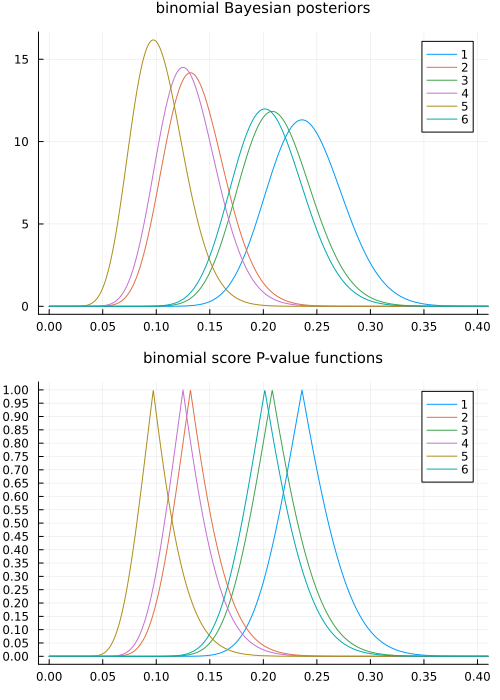

In [19]:
plot_pp(; data=[34, 19, 30, 18, 14, 29], xlim=(-0.01, 0.41), xtick=0:0.05:1)

上の結果の下段がP値関数のグラフである. このように, P値関数は事後分布と同じように使える.

### P値関数の側を確率密度関数に変換してからプロット

In [20]:
function pval2pdfhdi(pvalfunc, xcenter, xmin, xmax)
    Db = backward_fdm(5, 1)
    Df = forward_fdm(5, 1)
    function pdfhdi(x)
        xmin < x < xmax || return 0.0
        pval_x = pvalfunc(x)
        f(x) = pvalfunc(x) - pval_x
        if x == xcenter
            a = Db(pvalfunc, x)
            b = Df(pvalfunc, x)
        elseif x < xcenter
            y = find_zero(f, (xcenter, xmax))
            a = Db(pvalfunc, x)
            b = Df(pvalfunc, y)
        else
            y = find_zero(f, (xmin, xcenter))
            a = Db(pvalfunc, y)
            b = Df(pvalfunc, x)
        end
        safediv(a*b, b - a)
    end
    pdfhdi
end

function plot_pp2(; data=[34, 19, 30, 18, 14, 29], kwargs...)
    P = plot()
    for (i, dist) in enumerate(posteriors_bin(data))
        plot!(dist, 0, 1; label="$i")
    end
    plot!(xtick=0:0.1:1)
    title!("binomial Bayesian posteriors")

    n = sum(data)
    Q = plot()
    for (i, x) in enumerate(data)
        pdfhdi = pval2pdfhdi(p -> pvalue_bin(x, n, p), x/n, 0.0, 1.0)
        plot!(pdfhdi, 0, 1; alpha=1, label="$i")
    end
    plot!(xtick=0:0.1:1)
    title!("binomial score P-value pdfs")

    plot(P, Q; size=(500, 700), layout=(2, 1), kwargs...)
end

function plot_pp3(; data=[34, 19, 30, 18, 14, 29], kwargs...)
    n = sum(data)
    PP = []
    for (i, (x, dist)) in enumerate(zip(data, posteriors_bin(data)))
        pdfhdi = pval2pdfhdi(p -> pvalue_bin(x, n, p), x/n, 0.0, 1.0)
        P = plot()
        plot!(dist, 0, 1; label="posterior $i")
        plot!(pdfhdi, 0, 1; label="P-value pdf $i", ls=:dash)
        plot!(xtick=0:0.1:1)
        push!(PP, P)
    end

    plot(PP...; size=(800, 750), layout=(3, 2), kwargs...)
end

plot_pp3 (generic function with 1 method)

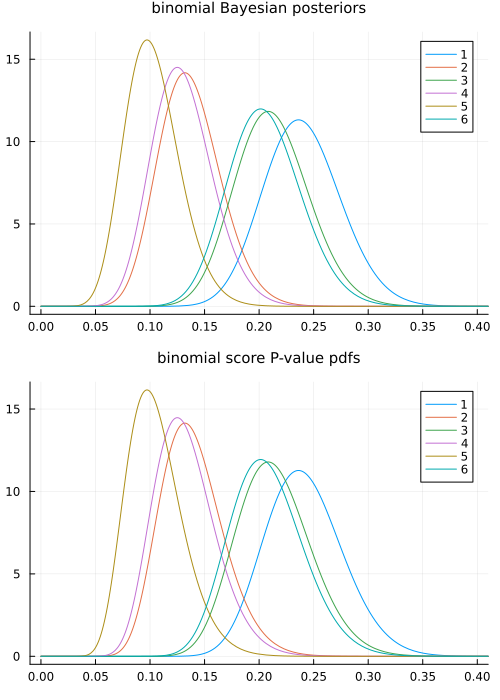

In [21]:
plot_pp2(; data=[34, 19, 30, 18, 14, 29], xlim=(-0.01, 0.41), xtick=0:0.05:1)

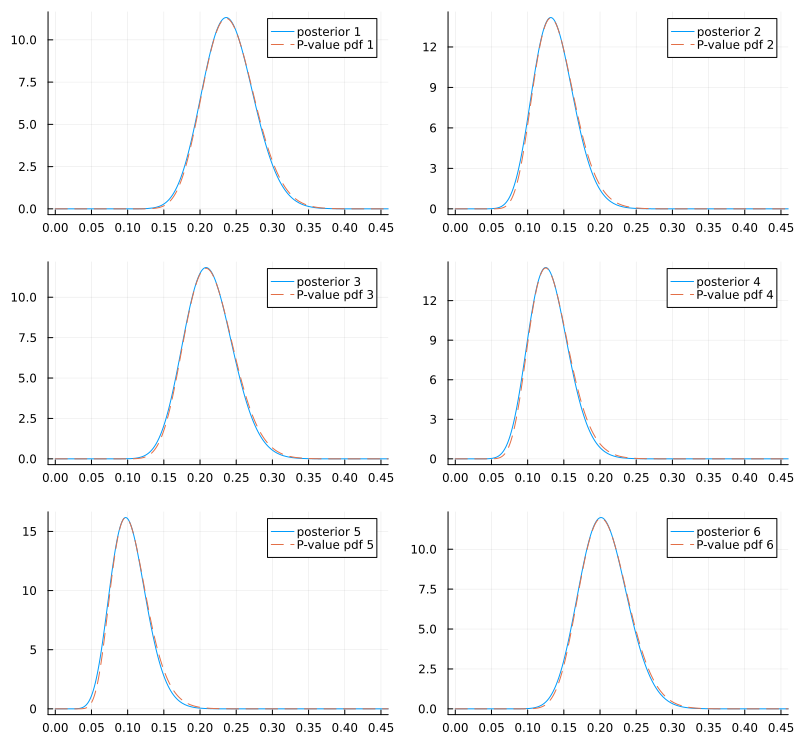

In [22]:
plot_pp3(; data=[34, 19, 30, 18, 14, 29], xlim=(-0.01, 0.46), xtick=0:0.05:1)

### 事後分布の側をP値関数に変換してプロット

In [23]:
function pvalue_hdi(dist::ContinuousUnivariateDistribution, x₀; xlim = extrema(dist))
    p₀ = pdf(dist, x₀)
    xmode = mode(dist)
    f(x) = pdf(dist, x) - p₀
    if x₀ == xmode
        1.0
    elseif x₀ > xmode
        x₁ = find_zero(f, (xlim[begin], xmode))
        cdf(dist, x₁) + ccdf(dist, x₀)
    else
        x₁ = find_zero(f, (xmode, xlim[end]))
        cdf(dist, x₀) + ccdf(dist, x₁)
    end
end

function pvalue_bayes_hdi(x, n, p; prior=Beta(1, 1))
    posterior = posterior_bin(x, n; prior)
    a, b = params(posterior)
    if a == 1 && b == 1
        1.0
    elseif a ≤ 1
        ccdf(posterior, p)
    elseif b ≤ 1
        cdf(posterior, p)
    else
        pvalue_hdi(posterior, p)
    end
end

function plot_pp4(; data=[34, 19, 30, 18, 14, 29], kwargs...)
    P = plot()
    for (i, dist) in enumerate(posteriors_bin(data))
        plot!(p -> pvalue_hdi(dist, p), 0, 1; label="$i")
    end
    plot!(xtick=0:0.1:1, ytick=0:0.05:1)
    title!("binomial Bayesian posterior P-value functions")

    n = sum(data)
    Q = plot()
    for (i, x) in enumerate(data)
        plot!(p -> pvalue_bin(x, n, p), 0, 1; label="$i")
    end
    plot!(xtick=0:0.1:1, ytick=0:0.05:1)
    title!("binomial score P-value functions")

    plot(P, Q; size=(500, 700), layout=(2, 1), kwargs...)
end

function plot_pp5(; data=[34, 19, 30, 18, 14, 29], kwargs...)
    n = sum(data)
    PP = []
    for (i, (x, dist)) in enumerate(zip(data, posteriors_bin(data)))
        pdfhdi = pval2pdfhdi(p -> pvalue_bin(x, n, p), x/n, 0.0, 1.0)
        P = plot()
        plot!(p -> pvalue_hdi(dist, p), 0, 1; label="Bayesian P-value $i")
        plot!(p -> pvalue_bin(x, n, p), 0, 1; label="score P-value $i", ls=:dash)
        plot!(xtick=0:0.1:1, ytick=0:0.05:1)
        push!(PP, P)
    end

    plot(PP...; size=(800, 750), layout=(3, 2), 
        tickfontsize=6, kwargs...)
end

plot_pp5 (generic function with 1 method)

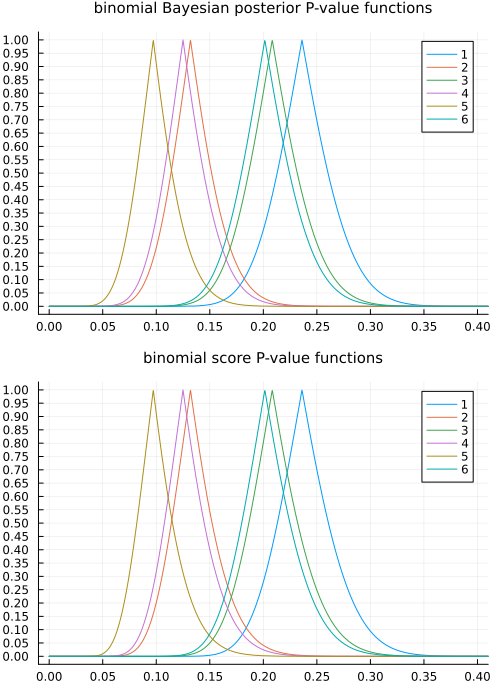

In [24]:
plot_pp4(; data=[34, 19, 30, 18, 14, 29], xlim=(-0.01, 0.41), xtick=0:0.05:1)

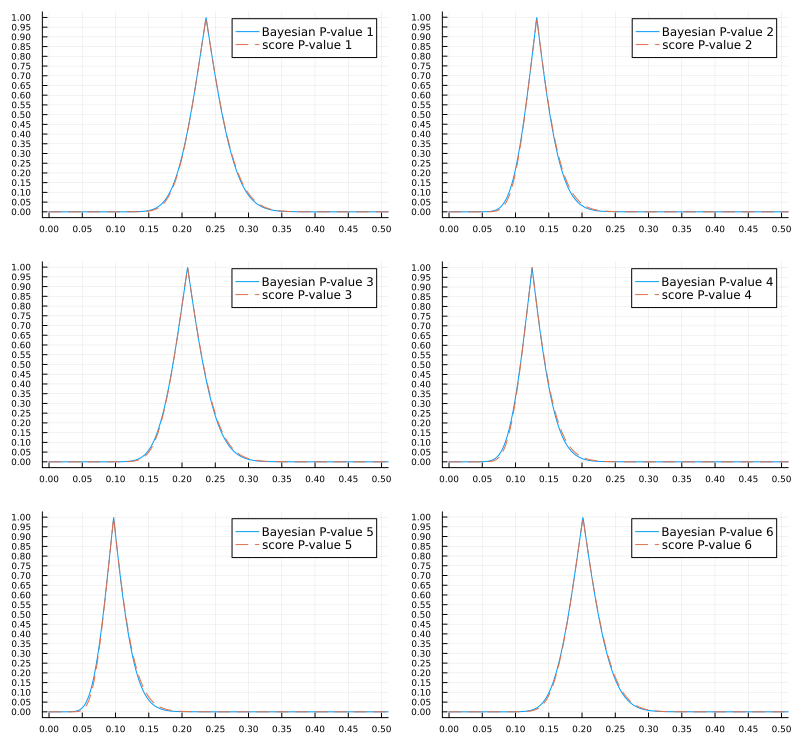

In [25]:
plot_pp5(; data=[34, 19, 30, 18, 14, 29], xlim=(-0.01, 0.51), xtick=0:0.05:1)

## Pearsonのχ²検定のP値関数を近似するベイズ的なP値関数

In [26]:
function chisq_pearson(k, p)
    n = sum(k)
    sum((k - n*p)^2/(n*p) for (k, p) in zip(k, p))
end

function pvalue_mult_chisq_pearson(k, p)
    df = length(p) - 1
    χ² = chisq_pearson(k, p)
    ccdf(Chisq(df), χ²)
end

function pvalue_mvn_sqmahal(mvn::MvNormal, x)
    df = length(mvn)
    χ² = sqmahal(mvn, x)
    ccdf(Chisq(df), χ²)
end

function dir2mvn(dir::Dirichlet)
    μ, Σ = mean(dir)[1:end-1], cov(dir)[1:end-1, 1:end-1]
    MvNormal(μ, Σ)
end

function pvalue_dir_sqmagal(dir::Dirichlet, p)
    mvn = dir2mvn(dir)
    pvalue_mvn_sqmahal(mvn, p)
end

function posterior_dir(k; κ=fill(0, length(k)))
    Dirichlet(κ + k)
end

posterior_dir (generic function with 1 method)

In [27]:
k = [40, 60, 100]

xlim = (0.1, 0.3)
ylim = (0.2, 0.4)
xs = range(xlim..., 101)
ys = range(ylim..., 101)
xtick = ytick = 0:0.02:1

f(x, y) = x+y ≤ 1 ? pvalue_mult_chisq_pearson(k, [x, y, 1-x-y]) : NaN

dir = posterior_dir(k)
mvn = dir2mvn(dir)
g(x, y) = x+y ≤ 1 ? pvalue_mvn_sqmahal(mvn, [x, y]) : NaN

g (generic function with 1 method)

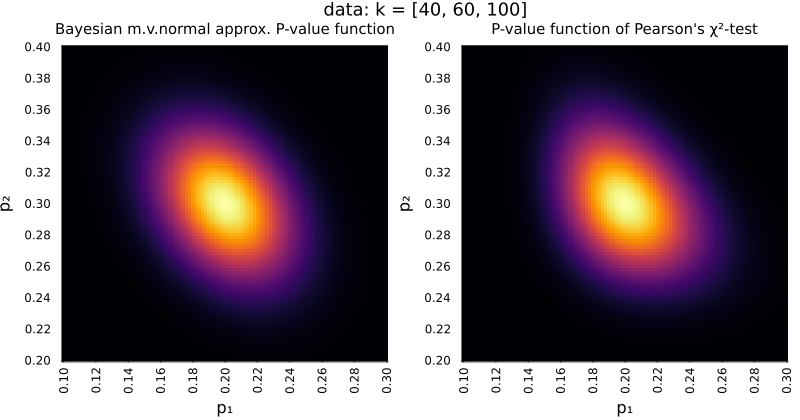

In [28]:
P = heatmap(xs, ys, f; label="", colorbar=false)
plot!(; xtick, ytick, xrotation=90)
plot!(xguide="p₁", yguide="p₂")
title!("P-value function of Pearson's χ²-test")

Q = heatmap(xs, ys, g; label="", colorbar=false)
plot!(; xtick, ytick, xrotation=90)
plot!(xguide="p₁", yguide="p₂")
title!("Bayesian m.v.normal approx. P-value function")

plot(Q, P; size=(800, 420))
plot!(bottommargin=4Plots.mm)
plot!(plot_title="data: k = $k")

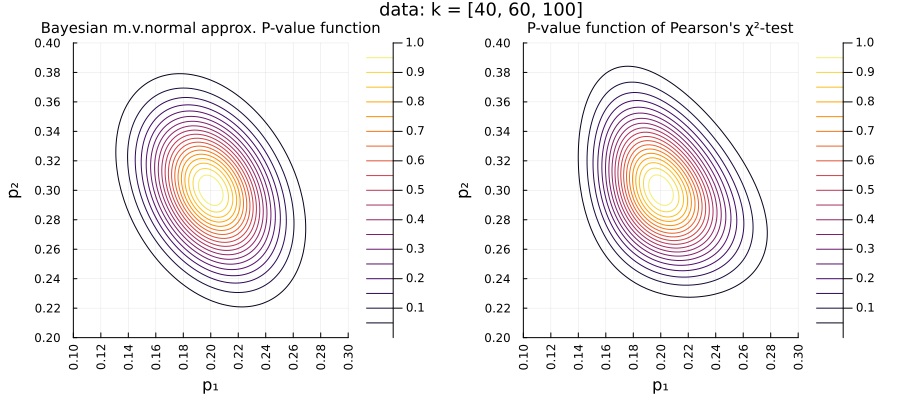

In [29]:
levels = 0.05:0.05:0.95

P = contour(xs, ys, f; label="", levels)#, colorbar=false)
plot!(; xtick, ytick, xrotation=90)
plot!(xguide="p₁", yguide="p₂")
title!("P-value function of Pearson's χ²-test")

Q = contour(xs, ys, g; label="", levels)#, colorbar=false)
plot!(; xtick, ytick, xrotation=90)
plot!(xguide="p₁", yguide="p₂")
title!("Bayesian m.v.normal approx. P-value function")

plot(Q, P; size=(900, 400))
plot!(bottommargin=6Plots.mm, leftmargin=4Plots.mm)
plot!(plot_title="data: k = $k")